In [1]:
import Image
filename = '../data/AR/M-001-01.bmp'


In [3]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
# from sklearn.preprocessing import normalize
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from display_network import *


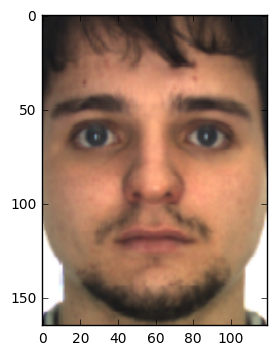

In [22]:
from scipy import ndimage
from scipy import misc
face = misc.imread('../data/AR/M-002-01.bmp')
plt.imshow(face)
plt.show()

In [47]:
print(face.shape)

import matplotlib.image as mpimg

def rgb2gray(rgb):
#     Y' = 0.299 R + 0.587 G + 0.114 B 
    return rgb[:,:,0]*.299 + rgb[:, :, 1]*.587 + rgb[:, :, 2]*.114

face_gray = rgb2gray(face)
print(face_gray.shape)
face_gray_vec = face_gray.reshape(165*120, 1)
print(face_gray_vec.shape)

ProjectionMatrix = np.random.randn(500, 19800).T 

f1 = np.dot(RandomProject, face_gray_vec)

(165, 120, 3)
(165, 120)
(19800, 1)


In [61]:
from sklearn import preprocessing

train_id = np.arange(1, 26)
test_id = np.arange(26, 50)

view_id = np.hstack((np.arange(1, 8), np.arange(14, 21)))
D = 165*120 
d = 500

path = '../data/AR/'
def build_filename(pre, im_id, v_id):
    return path + pre + str(im_id).zfill(3) + '-' + \
        str(v_id).zfill(2) + '.bmp'

def build_data_matrix(img_id, view_id):
    total_imgs = img_id.shape[0]*view_id.shape[0]*2 
    print(total_imgs, D)
    X_full = np.zeros((total_imgs, D))
    y = np.hstack((np.zeros((total_imgs/2, )), np.ones((total_imgs/2, ))))
    count = 0 
    for pre in ['M-', 'W-']:
        for im_id in img_id:
            for v_id in view_id:
                filename = build_filename(pre, im_id, v_id)
                # load img 
                rgb = misc.imread(filename)
                # convert to gray scale 
                gray = rgb2gray(rgb)
                # vectorization each row is a data point 
                im_vec = gray.reshape(1, D)
                # stack into X 
                X_full[count, :] = im_vec 
                count += 1 
    
    X = np.dot(X_full, ProjectionMatrix)
    # scale to mean 0 and standard deviation 1 
    X_scaled = preprocessing.scale(X)
    return (X_scaled, y)
                
(X_train, y_train) = build_data_matrix(train_id, view_id)

(700, 19800)


In [62]:
print(y_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [63]:
# print(X_train)
# print(X_train.mean(axis=0))
# print(X_train.var(axis = 0))

# train the logistic regression model 
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [64]:
(X_test, y_test) = build_data_matrix(test_id, view_id)
y_pred = logreg.predict(X_test)
print "Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred))

(672, 19800)
Accuracy: 91.37 %
